<a href="https://colab.research.google.com/github/jamsunator/SYSC4906/blob/master/Copy_of_Assignment2_Jameel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4415 - Assignment 2

**TA: François Charih \<francois@charih.ca\>**

**Deadline: March 19th, 2023 @ 11:59PM**

## Learning objectives

1. Fine-tune pre-trained CNN architectures for a custom image classification challenge.

2. Evaluate the performance of machine learning models using different metrics (precision-recall curve, confusion matrices, *etc.*).

3. Get hands-on experience with modern machine learning and plotting libraries.

## Instructions

1. Give yourself plenty of time to complete the assignment (it could take you up to 8-10 hours if you are unfamiliar with Python and machine learning libraries). The models should not take more than 1h to fine-tune (my full notebook runs from start to end in a little under 40 minutes. Coding will be the most time-consuming. ⚠️**Do not wait to the last minute.** ⚠️

2. You must use the prescribed methods/functions/libraries mentioned, whenever specified. The functions you need are already imported for you in the appropriate sections. You can reorganize the imports and import the full packages instead of specific functions if you so desire. I imported the necessary functions for you so that they are ready to be invoked without have to specify the full path to the functions with the dot operator (i.e. so that you invoke `function()` instead of `package.module.function()`).

3. Make sure to include comments for non-trivial code. It is okay to add some code cells, if you think it will give your code better readability/structure.

4. If you are unsure about something, clearly state your assumptions and complete the question based off these assumptions.

5. Be careful as you complete the assignment. There are several text-based questions to be answered in Markdown (text) cells. The questions are accompanied by the ❓ emoji. Your answers should be entered in the markdown cells with the 📝 emoji.

6. Submit your Notebook as a `.ipynb` file that adopts this naming convention: *SYSC4415W23_A2_\<First Name\>_\<Last Name\>_\<StudentID\>.ipynb* on Brightspace. I should be able to run your code without errors.

7. Make sure you enable a GPU accelerator (in Runtime > Change runtime type) starting at Part 4 and that your training code uses it. GPU resources are limited, so it is recommended not to use the accelerator for prior steps.

8. All plots should be made with matplotlib and labeled properly (ie. include axis labels and legends).

## Context

It is 2030, and a new RNA virus named SARS-CoV-3 is wreaking havoc across the globe. Its death rate is estimated at 95%, making it one of the deadliest  respiratory viruses known to mankind. Fortunately, an Ottawa-based biotech company developed a nasally-delivered vaccine *Greenraza*™️ that can neutralize the virus in living patients. However, administrating the vaccine increases the risk of lung cancer by a whooping 60%. It is therefore vital that the drug be administered to infected patients only, not to patients infected with another respiratory virus such as the common cold or influenza. The virus cannot be detected through blood or breath analyses. It can only be detected by means of x-ray imaging.

Having heard of your newly developed expertise in deep learning, you have been tasked by the Ottawa Hospital with the design of a machine learning model capable of distinguishing patients infected with SARS-CoV-3 from patients that have pneumonia and non-infected patients. Healthy patients can be discharged, while patients with pneumonia must be isolated, but without being given *Greenraza*™️.

## Project initialization

Run the cells below to set-up the notebook (ie. download the dataset) and install the required external libraries.

In [ ]:
# RUN THIS (downloads the dataset)
! rm -rf SYSC4415W23_A2_dataset SYSC4415W23_A2_dataset.zip
! wget https://github.com/jrgreen7/SYSC4906/releases/download/Assignment2/SYSC4415W23_A2_dataset.zip && unzip SYSC4415W23_A2_dataset.zip

In [ ]:
# RUN THIS (installs external libraries)
!pip install timm
!pip install git+https://github.com/nottombrown/imagenet_stubs
!pip install torchstat

## Part 1: Preparing the dataset

The Ottawa Hospital has provided you with a dataset to develop your model. The dataset is available here. The dataset contains a folder containing a spreadsheet with metadata for each image in the dataset and a subfolder containing the 200x200 images (with random filenames).

In [ ]:
from pandas import read_csv
from matplotlib.pyplot import bar, xlabel, ylabel, title

**Step 1:** Using pandas' `read_csv` function, load the dataframe containing the image metadata (`dataset_metadata.csv`).

In [ ]:
# Loads the image metadata into a pandas dataframe

# YOUR CODE HERE

image_data = read_csv("SYSC4415W23_A2_dataset/dataset_metadata.csv")

**Step 2:** Use the `head` method to print the top five rows of the dataframe.

In [ ]:
# Prints the top five rows in the dataset

# YOUR CODE HERE
image_data.head()

,filename,split,xray_date,height,width,label
0,272_normal.jpg,training,2030-11-18 06:50:42,200,200,normal
1,788_normal.jpg,training,2030-06-20 21:32:45,200,200,normal
2,622_normal.jpg,training,2030-07-12 06:56:19,200,200,normal
3,1138_normal.jpg,training,2030-03-15 13:52:16,200,200,normal
4,1568_normal.jpg,training,2030-12-22 22:09:18,200,200,normal


**Step 3:** Using pandas' [query method](https://pandas.pydata.org/docs/user_guide/indexing.html#the-query-method) and the `len` methods on the selections, print the number of images in the training, validation and test sets.

In [ ]:
# Prints the dimensions of the dataframe

# YOUR CODE HERE

train_length = len(image_data.query('split == "training"'))
validation_length = len(image_data.query('split == "validation"'))
test_length = len(image_data.query('split == "test"'))

print(f'Number of images in training set: {train_length}')
print(f'Number of images in validation set: {validation_length}')
print(f'Number of images in test set: {test_length}')

Number of images in training set: 2222
Number of images in validation set: 645
Number of images in test set: 505


**Step 4:** Using the `value_counts` method on the “label” column, provide the composition of the dataset in terms of the number of SARS-CoV-3 cases, pneumonia cases and healthy x-rays. In another cell, prepare a bar chart from that data using matplotlib's `bar` method. Note that the result of the `value_counts` methods is a series object whose property `index` is the label.

In [ ]:
# Generates a breakdown of the images' classes

# YOUR CODE HERE

num_normal = image_data["label"].value_counts()["normal"]
num_pneumonia = image_data["label"].value_counts()["pneumonia"]
num_sars = image_data["label"].value_counts()["sarscov3"]

print(f'There are {num_normal} rows in the dataset with a label column of `normal`')
print(f'There are {num_pneumonia} rows in the dataset with a label column of `pneumonia`')
print(f'There are {num_sars} rows in the dataset with a label column of `sarscov3`')




There are 1500 rows in the dataset with a label column of `normal`
There are 1300 rows in the dataset with a label column of `pneumonia`
There are 572 rows in the dataset with a label column of `sarscov3`


<BarContainer object of 3 artists>

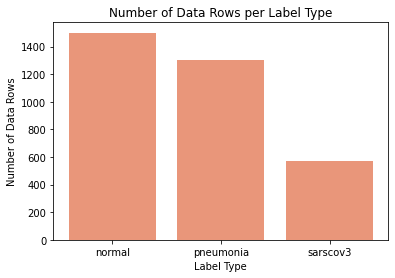

In [ ]:
# Plots a bar chart

# YOUR CODE HERE
x = ["normal", "pneumonia", "sarscov3"]
y = [num_normal, num_pneumonia, num_sars]

title("Number of Data Rows per Label Type")
xlabel("Label Type")
ylabel("Number of Data Rows")
bar(x, y, color ='darksalmon',
        width = 0.8)

❓ ***Question: Is the data balanced or not? If not, specify why class imbalance makes classification more difficult, and suggest one method you could use to deal with the imbalanced data.***

📝 

The data is not balanced. There is a significantly smaller amount of `sarscov3` data rows than `normal` and `pneumonia` data rows. This may result in a bias when classifying labels. A potential solution to this is oversampling which will make multiple copies of samples to make up for the lack of examples of a certain class/label.

## Part 2: Applying pre-trained CNN models to the data

Researchers make pre-trained neural networks available to the community at large. There are many, many pre-trained CNNs available in online repositories that researchers can leverage for their own applications.

In [ ]:
from torchvision.io import read_image
from timm import create_model
from matplotlib.pyplot import imread, imshow
from imagenet_stubs.imagenet_2012_labels import label_to_name
import torch

**Step 1:** Display the image `SYSC4415W23_A2_dataset/training/sarscov3/100_sarscov3.jpg` from the training set. The matplotlib methods `imread` and `imshow` are useful. 😉

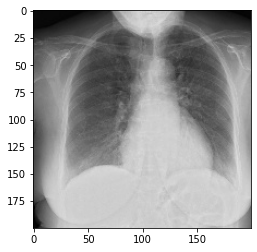

In [ ]:
# Display the image with matplotlib's imread/imshow

# YOUR CODE HERE

arr = imread("SYSC4415W23_A2_dataset/training/sarscov3/100_sarscov3.jpg")
imshow(arr)

**Step 2:** Load the ImageNet-pretrained InceptionV3 (`inception_v3`) and ResNet50 (`resnet50`) models with `timm` (this was done in Anthony's CIFAR100 tutorial with PyTorch). Use them to predict the class of the image along with the probability (not the logit). The probability is the result of applying the softmax function to the logits.

Of course, because the models were pretrained on ImageNet, it will not predict any of the classes that interest us.

***Notes:**
1. The `read_image` function can convert an image on disk to a tensor.

2. The function `label_to_name` that I imported for you converts the index of an ImageNet class to its English name.

3. You can call softmax on a tensor using `my_tensor.softmax(0)`.

In [ ]:
# Loads the image in a Tensor (the method read_image can load the image in a tensor), calls unsqueeze(0) on the tensor to add a dimension and convert its entries to floats using the .float() method

# YOUR CODE HERE

tensor_image = read_image("SYSC4415W23_A2_dataset/training/sarscov3/100_sarscov3.jpg")
unsqueeze_tensor = tensor_image.unsqueeze(0)
in_tensor = unsqueeze_tensor.float()

In [ ]:
# Loads the InceptionV3 model, and prints the class of the image along with its probability

# YOUR CODE HERE
model_inception = create_model('inception_v3', pretrained=True)
model_inception.eval()
with torch.no_grad():
  outputs = model_inception(in_tensor)
  probs, indices = torch.softmax(outputs, dim=1).topk(1)

class_idx = indices.item()
class_prob = probs.item()
class_name = label_to_name(class_idx)
print(class_name)
print(class_prob)


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


pitcher, ewer
0.9999599456787109


In [ ]:
# Loads the ResNet50 model, and prints the class of the image along with its probability

# YOUR CODE HERE
# load the model
model_resnet = create_model('resnet50', pretrained=True)
model_resnet.eval()
with torch.no_grad():
  outputs = model_resnet(in_tensor)
  probs, indices = torch.softmax(outputs, dim=1).topk(1)

class_idx = indices.item()
class_prob = probs.item()
class_name = label_to_name(class_idx)
print(class_name)
print(class_prob)




Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


kelpie
1.0


❓ ***Question: What classes are predicted for the two models? Are the models confident? Is it a good thing?***

📝 

*Inception_v3 model:*

The pitcher, ewer class class is predicted for the inception model. There is a very high probability value associated with this. This is not good because the image has nothing to do with a pitcher, ewer. We would prefer a lower probability.

*Resnet50 model:*

The kelpie class is predicted for the resnet50 model. Once again we have a high probability which is bad because the model is confident when it shouldn't be.



## Part 3: Instantiating the dataloaders to perform fine tuning
When working with large image datasets with PyTorch, people often implement a DataLoader to help manage how images are loaded during training. The dataloader can be combined with methods that implement data augmentation by modifying the images with transforms (eg. scaling, rotation, reflection, cropping, etc.). For the most common applications, there are existing data loaders that are perfectly suitable and that users can use instead of defining their own.


In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms

**Step 1:** Using the `ImageFolder` strategy to build a dataloader with a batch size of 128 for training. ([This tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#afterword-torchvision) is most helpful.)

You will also want your dataloader for your training set to apply the following data augmentation transforms (documentation available [here](https://pytorch.org/vision/stable/transforms.html)):

1. Random rotation between -10 and 10 deg
2. Random horizontal flip with 40% probability

In [ ]:
# Creates the dataset and dataloader that will be used for training

# YOUR CODE HERE

data_transform = transforms.Compose([
    transforms.RandomRotation(degrees = 10),
    transforms.RandomHorizontalFlip(p = 0.4),
    transforms.ToTensor()
])

dataset_train = ImageFolder("SYSC4415W23_A2_dataset/training/", transform = data_transform)
train_loader = DataLoader(dataset_train, batch_size=128, shuffle = True)

**Step 2**: Create the dataloaders you will be using for validation and testing. The transform should only convert the images to a tensor. You should not specify a batch size for the test set dataloader.

In [ ]:
# Creates the dataloader that will be used for validation

# YOUR CODE HERE
val_test_transform = transforms.Compose([
    transforms.ToTensor()
])
dataset_val = ImageFolder("SYSC4415W23_A2_dataset/validation/", transform = val_test_transform)
val_loader = DataLoader(dataset_val, shuffle = False)

In [ ]:
# Creates the dataloader that will be used testing

# YOUR CODE HERE

dataset_test = ImageFolder("SYSC4415W23_A2_dataset/test/", transform = val_test_transform)
test_loader = DataLoader(dataset_test, shuffle = False)

## Part 4: Fine-tuning existing CNN architectures

The Inception V3 and ResNet50 models you loaded above were trained on ImageNet which is not a medical dataset. In order to leverage these models for our purposes, we need to modify the architecture so that the final classification layer contains an appropriate number of classes and retune the model weights so that the models become suitable for the classification of our x-rays.


In [ ]:
from timm import create_model
import time
from matplotlib.pyplot import subplots
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from torch import no_grad, Tensor

**Step 1:** Using `create_model` from the `timm` package, Load the InceptionV3 and ResNet50 models, replacing the final layer with one appropriate for our purpose (recall that we want to classify x-rays of healthy, pneumonia and SARS-CoV-3 patients). Note that the timm library can assist in replacing the final layer (see [Anthony's tutorial](https://github.com/jrgreen7/SYSC4906/blob/master/W2023/Tutorials/CIFAR100_tutorial_WIP.ipynb)). These are your modified models.

In [ ]:
# Loads the InceptionV3 model and replaces the final classification layer with a new dense layer

# YOUR CODE HERE

inception_model = create_model('inception_v3', num_classes = 3, pretrained = True) # 3 classes because we have 3 labels

In [ ]:
# Loads the ResNet50 model and replaces the final classification layer with a new dense layer

# YOUR CODE HERE
resnet_model = create_model('resnet50', num_classes = 3, pretrained = True).cuda() # 3 classes because we have 3 labels

**Step 2:** In a tutorial with Anthony, you have seen that you can convert a base learning rate to an effective learning rate based on the batch size you have selected using the following heuristic:

$$\eta_{eff} = \frac{B\eta_{base}}{256}$$

where $\eta$ is the learning rate and $B$ is the batch size.

Train the final layer modified InceptionV3 and ResNet50 models on your training set. Use the **base** learning rate $\eta_{base}$ of 0.0005.

Use the following settings:

**Epochs:** 25

**Optimizer:** AdamW

**Loss function:** Cross-entropy (it is not required here, but note that using the weight parameter here could help deal with class imbalance)

Implement the training loop yourself. Do not use a package that automates the process. Anthony has demonstrated how to do this and much can be taken from [his example](https://github.com/jrgreen7/SYSC4906/blob/master/W2023/Tutorials/CIFAR100_tutorial_WIP.ipynb).

❗**Important: Make sure you are using a colab gpu and to store the mean training and validation performance/loss at each epoch as you will be plotting them in the next steps.**

In [ ]:
# Moves the modified inceptionV3 model to GPU

# YOUR CODE HERE
inception_model.cuda()
print() 

In [ ]:
# Instantiates the optimizer for the modified InceptionV3 model using the specified effective learning rate

# YOUR CODE HERE
base_lr = 0.0005
batch = 128
effective_learning_rate = base_lr * batch / 256
opt = torch.optim.AdamW(inception_model.parameters(), lr = effective_learning_rate)
epochs = 25
loss_function = torch.nn.CrossEntropyLoss()

In [ ]:
# Sets up the loss function for the modified InceptionV3 model

# YOUR CODE HERE
inception_train_losses = []
inception_val_losses = []

for epoch in range(epochs):
  start_time = time.time()
  train_losses = []
  inception_model.train()
  for batch in train_loader:
    batch_imgs, batch_labels = batch
    batch_imgs = batch_imgs.cuda()
    batch_labels = batch_labels.cuda()

    logits = inception_model(batch_imgs)
    loss = loss_function(logits, batch_labels)
    loss.backward()

    opt.step()
    opt.zero_grad()
    train_losses.append(loss.item())
  
  val_losses = []
  inception_model.eval()
  with torch.no_grad():
    for batch in val_loader:
      batch_imgs, batch_labels = batch
      batch_imgs = batch_imgs.cuda()
      batch_labels = batch_labels.cuda()

      logits = inception_model(batch_imgs)
      loss = loss_function(logits, batch_labels)
      val_losses.append(loss.item())
  
  train_time = time.time() - start_time
  epoch_train_loss = Tensor(train_losses).mean().item()
  inception_train_losses.append(epoch_train_loss)
  epoch_val_loss = torch.Tensor(val_losses).mean().item()
  inception_val_losses.append(epoch_val_loss)
  print(f'Epoch: {epoch}  Train Loss: {epoch_train_loss:8.6f}   Val Loss: {epoch_val_loss:8.6f}  Time: {train_time:6.4f}')

Epoch: 0  Train Loss: 0.555517   Val Loss: 0.753006  Time: 29.0064
Epoch: 1  Train Loss: 0.180992   Val Loss: 0.179518  Time: 19.4535
Epoch: 2  Train Loss: 0.119276   Val Loss: 0.133082  Time: 19.4610
Epoch: 3  Train Loss: 0.102100   Val Loss: 0.118570  Time: 19.5718
Epoch: 4  Train Loss: 0.061352   Val Loss: 0.101195  Time: 19.7366
Epoch: 5  Train Loss: 0.047001   Val Loss: 0.109115  Time: 19.6510
Epoch: 6  Train Loss: 0.039300   Val Loss: 0.136622  Time: 19.5936
Epoch: 7  Train Loss: 0.033794   Val Loss: 0.093029  Time: 19.5785
Epoch: 8  Train Loss: 0.025253   Val Loss: 0.089799  Time: 19.5424
Epoch: 9  Train Loss: 0.020763   Val Loss: 0.101276  Time: 19.4538
Epoch: 10  Train Loss: 0.016717   Val Loss: 0.088419  Time: 19.4838
Epoch: 11  Train Loss: 0.014117   Val Loss: 0.095039  Time: 19.5723
Epoch: 12  Train Loss: 0.007528   Val Loss: 0.120518  Time: 19.5568
Epoch: 13  Train Loss: 0.023933   Val Loss: 0.088025  Time: 19.7353
Epoch: 14  Train Loss: 0.036585   Val Loss: 0.123782  Time

In [ ]:
# Fine-tunes the weights in the final layer the modified InceptionV3 model (main learning loop)

# YOUR CODE HERE
"""
This is achieved with the call of optimizer.step() and loss.backward()
"""

'\nThis is achieved with the call of optimizer.step() and loss.backward()\n'

In [ ]:
# Moves the modified ResNet50 model to GPU

# YOUR CODE HERE
resnet_model.cuda()
print() 

In [ ]:
# Instantiates the optimizer for the modified ResNet50 model

# YOUR CODE HERE

opt = torch.optim.AdamW(resnet_model.parameters(), lr = effective_learning_rate)


In [ ]:
# Sets up the loss function for the modified ResNet50 model

# YOUR CODE HERE

resnet_train_losses = []
resnet_val_losses = []
for epoch in range(epochs):
  start_time = time.time()
  train_losses = []
  resnet_model.train()
  for batch in train_loader:
    batch_imgs, batch_labels = batch
    batch_imgs = batch_imgs.cuda()
    batch_labels = batch_labels.cuda()

    logits = resnet_model(batch_imgs)
    loss = loss_function(logits, batch_labels)
    loss.backward()

    opt.step()
    opt.zero_grad()
    train_losses.append(loss.item())
  
  val_losses = []
  resnet_model.eval()
  with torch.no_grad():
    for batch in val_loader:
      batch_imgs, batch_labels = batch
      batch_imgs = batch_imgs.cuda()
      batch_labels = batch_labels.cuda()

      logits = resnet_model(batch_imgs)
      loss = loss_function(logits, batch_labels)
      val_losses.append(loss.item())
  
  train_time = time.time() - start_time
  epoch_train_loss = Tensor(train_losses).mean().item()
  resnet_train_losses.append(epoch_train_loss)
  epoch_val_loss = torch.Tensor(val_losses).mean().item()
  resnet_val_losses.append(epoch_val_loss)
  print(f'Epoch: {epoch}  Train Loss: {epoch_train_loss:8.6f}   Val Loss: {epoch_val_loss:8.6f}  Time: {train_time:6.4f}')

Epoch: 0  Train Loss: 0.953217   Val Loss: 1.000931  Time: 14.6133
Epoch: 1  Train Loss: 0.619479   Val Loss: 0.816770  Time: 14.4920
Epoch: 2  Train Loss: 0.400629   Val Loss: 0.745610  Time: 14.4504
Epoch: 3  Train Loss: 0.284930   Val Loss: 0.773110  Time: 14.5955
Epoch: 4  Train Loss: 0.193082   Val Loss: 0.323317  Time: 14.3631
Epoch: 5  Train Loss: 0.118539   Val Loss: 0.304956  Time: 14.6889
Epoch: 6  Train Loss: 0.100444   Val Loss: 1.584266  Time: 14.4585
Epoch: 7  Train Loss: 0.084357   Val Loss: 0.802618  Time: 14.5351
Epoch: 8  Train Loss: 0.074906   Val Loss: 0.118023  Time: 14.4805
Epoch: 9  Train Loss: 0.047185   Val Loss: 0.219296  Time: 14.3771
Epoch: 10  Train Loss: 0.045717   Val Loss: 0.103338  Time: 14.4886
Epoch: 11  Train Loss: 0.044163   Val Loss: 0.122864  Time: 14.5244
Epoch: 12  Train Loss: 0.027912   Val Loss: 0.090533  Time: 14.4352
Epoch: 13  Train Loss: 0.025502   Val Loss: 0.117159  Time: 14.5641
Epoch: 14  Train Loss: 0.032935   Val Loss: 0.143408  Time

In [ ]:
# Fine-tunes the weights in the final layer the modified ResNet50 model (main learning loop)

# YOUR CODE HERE
"""
This is achieved with the call of optimizer.step() and loss.backward()
"""

'\nThis is achieved with the call of optimizer.step() and loss.backward()\n'

**Step 3:** In different labeled subplots, display the learning curves for each model. Each subplot should display loss on the training set and the validation set (*i.e.* 2 curves per subplot). Use matplotlib.

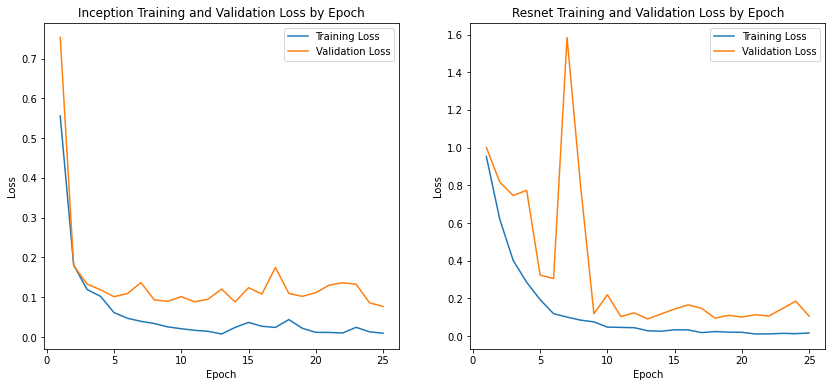

In [ ]:
# Displays the learning curves (loss) for both models in two separate subplots

# YOUR CODE HERE
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)

# x-axis 

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
     14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# plot 1
y_train = inception_train_losses
y_val = inception_val_losses
plt.subplot(1, 2, 1)
plt.plot(x, y_train)
plt.plot(x, y_val)
plt.title("Inception Training and Validation Loss by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"], loc ="upper right")

# plot 2



y_train = resnet_train_losses
y_val = resnet_val_losses
plt.subplot(1, 2, 2)
plt.plot(x, y_train)
plt.plot(x, y_val)
plt.title("Resnet Training and Validation Loss by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"], loc ="upper right")

plt.show()

❓ ***Question: Comment on your learning curves. What do they tell you?***

📝 As the number of iterations increases we can see the performance of botht the models becomes better and better. The training loss and validation loss are both decreasing in both models from the starting point to the finishing point. There are momentary increases but the general direction is decreasing. This shows that the model is converging and not overfitting to the training set. Since the validation loss is following the same pattern relative to training loss we can also say that the model is generalizing well to new data.

## Part 5: Performance evaluation on a test set

Of course, estimating the performance of your model on unseen data is a key step in machine learning methodology. Here, you will summarize model performance for your InceptionV3 model and ResNet50 model on the test set.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from torch import no_grad



**Step 1:** Iterate through the images in the test set using the test dataloader to make predictions for the test set images and retrieve their actual label (its index). Note that this is done in a way similar to the validation step in the training loop.

Append the predicted class index to a list, the actual labels to another and the probability of the SARS-CoV-3 class to another list.

Do this for both fine-tuned models.

Note that the indices map to the classes as follows:

0: normal

1: pneumonia

2: sarscov3

In [ ]:
# Creates a list of predictions, a list of actual labels and a list of probabilities of the SARS-CoV-3 class for the fine-tuned InceptionV3 model applied to the test set

# YOUR CODE HERE
inception_model.eval()
inception_predicted_values = []
actual_labels = []
inception_sars_probabilities = []

with torch.no_grad():
    for i, j in test_loader:

        images = i.to('cuda')
        labels = j.to('cuda')

        # Get model predictions
        outputs = inception_model(images)
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted)

        # Append predicted and actual labels to the lists
        inception_predicted_values.append(predicted.item())
        # print(labels.cpu().numpy())
        actual_labels.append(labels.cpu().numpy())

        # Get the probabilities for the SARS-CoV-3 class
        softmax = torch.nn.Softmax(dim=1)
        inception_sars_probabilities.append(softmax(outputs)[:,2].cpu().detach().numpy())


for index in range(0,len(inception_predicted_values)):
    print(f'Inception model Prediction: {inception_predicted_values[index]} :: Actual value from test set: {actual_labels[index][0]} :: Model confidence: {inception_sars_probabilities[index][0]:1.1f}')

Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Inception model Prediction: 0 ::

In [ ]:
# Creates a list of predictions, a list of actual labels and a list of probabilities of the SARS-CoV-3 class for the fine-tuned ResNet50 model applied to the test set

# YOUR CODE HERE


# YOUR CODE HERE
resnet_model.eval()
resnet_predicted_values = []
actual_labels = []
resnet_sars_probabilities = []

with torch.no_grad():
    for i, j in test_loader:

        images = i.to('cuda')
        labels = j.to('cuda')

        # Get model predictions
        outputs = resnet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        # print(predicted)

        # Append predicted and actual labels to the lists
        resnet_predicted_values.append(predicted.item())
        # print(labels.cpu().numpy())
        actual_labels.append(labels.cpu().numpy())

        # Get the probabilities for the SARS-CoV-3 class
        softmax = torch.nn.Softmax(dim=1)
        resnet_sars_probabilities.append(softmax(outputs)[:,2].cpu().detach().numpy())


for index in range(0,len(resnet_predicted_values)):
    print(f'Resnet model Prediction: {resnet_predicted_values[index]} :: Actual value from test set: {actual_labels[index][0]} :: Model confidence: {resnet_sars_probabilities[index][0]:1.1f}')

Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Model confidence: 0.0
Resnet model Prediction: 0 :: Actual value from test set: 0 :: Mo

**Step 2:** Show the confusion matrices for both models. The `confusion_matrix` function from scikit-learn I imported for you is useful for this.

In [ ]:
# Creates the confusion matrix for the modified InceptionV3 model

# YOUR CODE HERE
confusion_matrix(actual_labels, inception_predicted_values)


array([[226,   7,   0],
       [  2, 197,   1],
       [  0,   0,  72]])

In [ ]:
# Creates the confusion matrix for the modified ResNet50 model

# YOUR CODE HERE
confusion_matrix(actual_labels, resnet_predicted_values)

array([[229,   4,   0],
       [  9, 190,   1],
       [  0,   0,  72]])

❓ ***Question: Based off these matrices, report the accuracy of the models.***

📝

## Inception Model:

*Actual label = Normal*
- We correctly predicted 226 normal patients 
- We predicted pneumonia for 7 Normal patients
- We predicted sarscov3 for 0 normal patients

*Actual label = Pneumonia*
- we predicted normal for 2 pneumonia patients
- We correctly predicted 197 pneumonia patients
- We predicted sarscov3 for 1 pneumonia patient

*Actual label = sarscov3*
- we predicted normal for 0 sarscov3 patients
- we predicted pneumonia for 0 sarscov3 patients
- we correctly predicted 72 sarscov3 patients

The total number of correct predictions is:
226 + 197 + 72 = 495

The total number of predictions is:
495 + 7 + 2 + 1 = 505

Therefore, the *accuracy score* of the Inception model is:
498 / 512 = **98%**

## Resnet Model:

*Actual label = Normal Patient*
- We correctly predicted 229 normal patients 
- We predicted pneumonia for 4 Normal patients
- We predicted sarscov3 for 0 normal patients

*Actual label = Pneumonia*
- we predicted normal for 9 pneumonia patients
- We correctly predicted 190 pneumonia patients
- We predicted sarscov3 for 1 pneumonia patient

Actual label = sarscov3 *italicized text*
- we predicted normal for 0 sarscov3 patients
- we predicted pneumonia for 0 sarscov3 patients
- we correctly predicted 72 sarscov3 patients

The total number of correct predictions is:
229 + 197 + 72 = 491

The total number of predictions is:
491 + 4 + 9 + 1 = 505

Therefore, the *accuracy score* of the Inception model is:
498 / 512 = **97.2%**



**Step 3:** Use the `PrecisionRecallDisplay.from_predictions` methods documented [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.) to plot the precision recall curves for your models. There are three classes, so convert your labels so that it becomes a binary classification scenario, ie. SARS-CoV-3 vs. not-SARS-CoV-3.

<Figure size 3600x432 with 0 Axes>

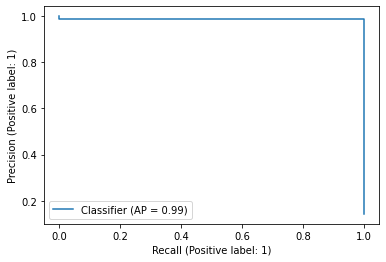

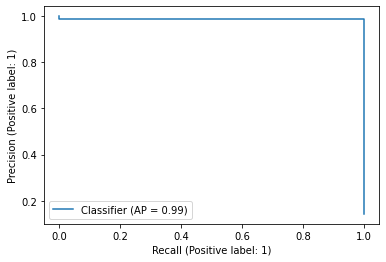

In [ ]:

# Plots the PR curves of your fine-tuned InceptionV3 and ResNet50 models 

# YOUR CODE HERE

import matplotlib.pyplot as plt
import numpy as np

actual_labels_binary = []
for label in actual_labels:
  actual_labels_binary.append(np.where(label == 2, 1, 0))

inception_predicted_values = np.array(inception_predicted_values)
resnet_predicted_values = np.array(resnet_predicted_values)

PrecisionRecallDisplay.from_predictions(actual_labels_binary, inception_predicted_values)
PrecisionRecallDisplay.from_predictions(actual_labels_binary, resnet_predicted_values)


❓ ***Question: Based off the results you obtained in this section, which model performs best? Why do you think (in 5 sentences or less)?***

📝 

When calculating the accuracy of the models in step 2, we can see that the inception model has an edge over the resnet model (98% to 97.2%). However, since we are mainly focused on the sarscov3 virus, we can see that the results of this are identical. Furthermore, the precision recall displays in step 3 are also identical because of the results with respect to sarscov3 patient results (we have 72 TP values and the rest of the values are 0). In conclusion, we give the edge to the Inception model, but we can make the argument that both models are equivelent when predicting sarscov3 based on the training data we have.

## Part 6: Answering questions from investors ❓

Bfizer has heard about your model and are interested in investing in your technology. However, before they engage in further discussions, they want you to answer the following questions:

1. Briefly provide techniques that you would explore next to further improve the performance of your model?

2. A competitor has trained an SVM on the same dataset but performs worse than your model. Why do CNNs perform better than SVM for image classification? Discuss two aspects: differences in features and differences in training data.

3. The investors consider investing in a very small device that can run your model. Would your best model fit on this small cost-effective device with 32 MB of storage, assuming that all parameters in the model are 16 bit floats (you can ignore everything in the model but the trainable parameters)? You can use the `torchstat` library ([link](https://github.com/Swall0w/torchstat)) to get the number of parameters. Note that the relevant function from this library was already imported for you (below).

4. If your best model predict a positive SARS-CoV-3 case, how likely is it that you are correct? How likely is it that you are wrong?

5. Assuming that the test data is representative of the disease status among the general population of Canada (it is not, why? hint: think of bias.), how many Canadians (Canada pop: 38M) currently have SARS-CoV-4? How much will it cost Canadians to inject all infected people if one dose of Greenraza™️ can be purchased for 13 CAD (Canadian Dollars)? How many people have pneumonia and need to be isolated? (Show your calculations.)

**Note: Your confusion matrices might be useful for the last 2 questions. 😉**

📝 YOUR SHORT ANSWERS GO HERE (add code cells below as needed for calculations, eg. for running the `stat` function from the `torchstat` package)

1. The first thing I would do to improve the performance of the model is increase the dataset and have equal amounts of data per label to avoid any issues with class imbalance. Another method that can be used to improve performance is to experiment with various hyperparameters to try and get improved accuracy scores. Lastly, we used the pretrained resnet50 and inception_v3 models to come up with the models used for this problem. We could fine tune other existing CNN architectures and use the best performing model, which would require a lot more experimentation.

2. CNNs perform better than SVMs:
Differences in features:
CNNs are able to reduce the complexity of images without losing information in that process. Moreover, SVMs aren't able to reduce that high complexity of an image which will cause it to take longer and even potentially miss certain features.
Differences in training data:
CNN's require a larger amount of training data compared to SVM's to generalize. Furthermore, SVM training data must be preprocessed more extensively to allow for the model to find the best hyperplane. Even if that is done, it still might not be possible for the SVM to outperform the CNN

3. The sizes of the Inception and Resnet models are listed below. We can wee thaat both of the models are greater than 32 MB of storage. Therefore, the cheapstake investors would not be able to run the model on their device.

4. Recall the confusion matrices below

Inception Model Confusion Matrix:

  
      [226,   7,   0]
       [  2, 197,   1]
       [  0,   0,  72]

Resnet Model Confusion Matrix:

      [229,   4,   0]
       [  9, 190,   1]
       [  0,   0,  72]


From both matrices we can see that both models predict sarscov3 correctly everytime if it is present in the patient. Moreover, this means there are no false negatives. Both models predict 1 single patient has sarscov3 when they actually have pneumonia. This is a False positive. 
We can conclue that the probability that either model is wrong when predicting a patient has sarscov3 is 1/(72+1) = **1%**

5. 
**How many canadians have SARS-CoV-3?**

72/505 * 100% = 14.2%

14.2% * 38M = *5.396 Million people have SARS-CoV-3*

**How much will it cose canadians to inject all infected people if one does of Greenraza is 13 CAD?**

5.396 Million people * 13 = 70, 148, 000

It will cost Canada 70 milliion dollars to inject all infected peoples

**How many people have pneumonia and need to be isolated?**

200 / 505 * 38M = 

15.05 Million people have pneumonia and need to isolate

In [ ]:
# Determines the number of trainable parameters in your best model
from torchstat import stat

# YOUR CODE HERE
def get_model_size(model):
  stat(model.cpu(), (3, 200, 200)) # images are 200 x 200
  x = 0
  for p in model.parameters():
    if p.requires_grad:
      x = x + p.numel()
  return x * 2 # 16 bit flotats so mult by 2 because 1 byte is 8 bits


inception_model_size = get_model_size(inception_model)
resnet_model_size = get_model_size(resnet_model)

  

In [ ]:
print(f'Inception Model Size: {inception_model_size} bytes')
print(f'Resnet Model Size: {resnet_model_size} bytes')

Inception Model Size: 43583430 bytes
Resnet Model Size: 47028358 bytes


See? It wasn't that hard, was it?! 😉